## Anomaly detection

### Problem Statement

In this exercise, you will implement an anomaly detection algorithm to
detect anomalous behavior in server computers.

The dataset contains two features -
   * throughput (mb/s) and
   * latency (ms) of response of each server.

While your servers were operating, you collected $m=307$ examples of how they were behaving, and thus have an unlabeled dataset $\{x^{(1)}, \ldots, x^{(m)}\}$.
* You suspect that the vast majority of these examples are “normal” (non-anomalous) examples of the servers operating normally, but there might also be some examples of servers acting anomalously within this dataset.

You will use a **Gaussian model** to detect anomalous examples in your dataset.
* You will first start on a 2D dataset that will allow you to visualize what the algorithm is doing.
* On that dataset you will fit a Gaussian distribution and then find values that have **very low probability** and hence can be considered anomalies.
* After that, you will apply the anomaly detection algorithm to a larger dataset with many dimensions.

### Dataset

You will start by loading the dataset for this task.
- The `load_data()` function shown below loads the data into the variables `X_train`, `X_val` and `y_val`
    - You will use `X_train` to fit a Gaussian distribution
    - You will use `X_val` and `y_val` as a cross validation set to select a threshold and determine anomalous vs normal examples

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from utils2 import *

# Load the dataset
X_train, X_val, y_val = load_data()

# Display the first five elements of X_train
print("The first 5 elements of X_train are:\n", X_train[:5])

The first 5 elements of X_train are:
 [[13.04681517 14.74115241]
 [13.40852019 13.7632696 ]
 [14.19591481 15.85318113]
 [14.91470077 16.17425987]
 [13.57669961 14.04284944]]


In [10]:
# Display the first five elements of X_val
print("The first 5 elements of X_val are\n", X_val[:5])

The first 5 elements of X_val are
 [[15.79025979 14.9210243 ]
 [13.63961877 15.32995521]
 [14.86589943 16.47386514]
 [13.58467605 13.98930611]
 [13.46404167 15.63533011]]


In [11]:
# Display the first five elements of y_val
print("The first 5 elements of y_val are\n", y_val[:5])

The first 5 elements of y_val are
 [0 0 0 0 0]


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

The code below prints the shape of `X_train`, `X_val` and `y_val`.

In [12]:
print('The shape of X_train is:', X_train.shape)
print('The shape of X_val is:', X_val.shape)
print('The shape of y_val is: ', y_val.shape)

The shape of X_train is: (307, 2)
The shape of X_val is: (307, 2)
The shape of y_val is:  (307,)


#### Visualize your data

Before starting on any task, it is often useful to understand the data by visualizing it.
- For this dataset, you can use a scatter plot to visualize the data (`X_train`), since it has only two properties to plot (throughput and latency)

- Your plot should look similar to the one below
<img src="images/x_latency_y_throughput.png" width="500" height="450">

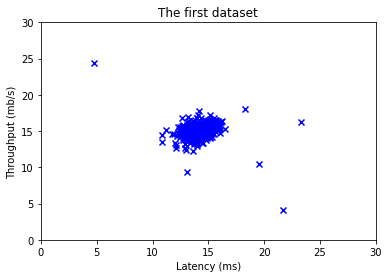

In [13]:
# Create a scatter plot of the data. To change the markers to blue "x",
# we used the 'marker' and 'c' parameters
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b')

# Set the title
plt.title("The first dataset")
# Set the y-axis label
plt.ylabel('Throughput (mb/s)')
# Set the x-axis label
plt.xlabel('Latency (ms)')
# Set axis range
plt.axis([0, 30, 0, 30])
plt.show()

### Gaussian distribution

To perform anomaly detection, you will first need to fit a model to the data’s distribution.

* Given a training set $\{x^{(1)}, ..., x^{(m)}\}$ you want to estimate the Gaussian distribution for each
of the features $x_i$.

* Recall that the Gaussian distribution is given by

   $$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

   where $\mu$ is the mean and $\sigma^2$ is the variance.

* For each feature $i = 1\ldots n$, you need to find parameters $\mu_i$ and $\sigma_i^2$ that fit the data in the $i$-th dimension $\{x_i^{(1)}, ..., x_i^{(m)}\}$ (the $i$-th dimension of each example).

### Estimating parameters for a Gaussian distribution

**Implementation**:

Your task is to complete the code in `estimate_gaussian` below.

### Exercise 1

Please complete the `estimate_gaussian` function below to calculate `mu` (mean for each feature in `X`) and `var` (variance for each feature in `X`).

You can estimate the parameters, ($\mu_i$, $\sigma_i^2$), of the $i$-th
feature 'column' by using the following equations. To estimate the mean, you will
use:

$$\mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}$$

and for the variance you will use:
$$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [52]:
# UNQ_C1
# GRADED FUNCTION: estimate_gaussian

def estimate_gaussian(X):
    """
    Calculates mean and variance of all features in the dataset
    Args:
        X (ndarray): (m, n) Data matrix
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """
    m, n = X.shape
    ### START CODE HERE ###

    #First 'mean' calculation
    mu = np.zeros(n)
    for i in range(0, n):
        for j in range(0, m):
            mu[i] += X[j][i]
        mu[i] = 1 / m * mu[i]

    # Or single line instead
    mu2 = 1 / m * np.sum(X, axis=0)
    print('mu == ', mu)
    print('mu2 ==', mu2)

    #Second 'variance or dispersion' calculation
    var = np.zeros(n)
    for i in range(0, n):
        for j in range(0, m):
            var[i] += (X[j][i] - mu[i]) ** 2
        var[i] = 1 / m * var[i]

    # Or use np function instead
    var2 = 1 / m * np.sum((X - mu) ** 2, axis=0)
    print('var == ', var)
    print('var2 ==', var2)

    ### END CODE HERE ###
    return mu, var


In [53]:
# Estimate mean and variance of each feature
mu, var = estimate_gaussian(X_train)

print("Mean of each feature:", mu)
print("Variance of each feature:", var)

# UNIT TEST
from public_tests2 import *

estimate_gaussian_test(estimate_gaussian)

mu ==  [14.11222578 14.99771051]
mu2 == [14.11222578 14.99771051]
var ==  [1.83263141 1.70974533]
var2 == [1.83263141 1.70974533]
Mean of each feature: [14.11222578 14.99771051]
Variance of each feature: [1.83263141 1.70974533]
mu ==  [1. 2. 3.]
mu2 == [1. 2. 3.]
var ==  [0. 0. 0.]
var2 == [0. 0. 0.]
mu ==  [2. 4. 6.]
mu2 == [2. 4. 6.]
var ==  [0.66666667 2.66666667 6.        ]
var2 == [0.66666667 2.66666667 6.        ]
mu ==  [0.00773447 1.04476872 3.02069367]
mu2 == [0.00773447 1.04476872 3.02069367]
var ==  [1.03408317 4.14592146 2.15513779]
var2 == [1.03408317 4.14592146 2.15513779]
All tests passed!


Now that you have completed the code in `estimate_gaussian`, we will visualize the contours of the fitted Gaussian distribution.

You should get a plot similar to the figure below.

<img src="../../../img/3_unsupervised_learning_recommenders_reinforcement_learning/week1/variance_means_dispersion.png" width="500"/>

From your plot you can see that most of the examples are in the region with the highest probability, while the anomalous examples are in the regions with lower probabilities.

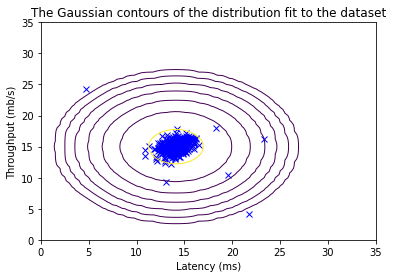

In [54]:
# Returns the density of the multivariate normal
# at each data point (row) of X_train
p = multivariate_gaussian(X_train, mu, var)

#Plotting code
visualize_fit(X_train, mu, var)

## Selecting the threshold $\epsilon$

Now that you have estimated the Gaussian parameters, you can investigate which examples have a very high probability given this distribution and which examples have a very low probability.

* The low probability examples are more likely to be the anomalies in our dataset.
* One way to determine which examples are anomalies is to select a threshold based on a cross validation set.

In this section, you will complete the code in `select_threshold` to select the threshold $\varepsilon$ using the $F_1$ score on a cross validation set.

* For this, we will use a cross validation set
$\{(x_{\rm cv}^{(1)}, y_{\rm cv}^{(1)}),\ldots, (x_{\rm cv}^{(m_{\rm cv})}, y_{\rm cv}^{(m_{\rm cv})})\}$, where the label $y=1$ corresponds to an anomalous example, and $y=0$ corresponds to a normal example.
* For each cross validation example, we will compute $p(x_{\rm cv}^{(i)})$. The vector of all of these probabilities $p(x_{\rm cv}^{(1)}), \ldots, p(x_{\rm cv}^{(m_{\rm cv})})$ is passed to `select_threshold` in the vector `p_val`.
* The corresponding labels $y_{\rm cv}^{(1)}, \ldots, y_{\rm cv}^{(m_{\rm cv})}$ are passed to the same function in the vector `y_val`.

### Exercise 2
Please complete the `select_threshold` function below to find the best threshold to use for selecting outliers based on the results from the validation set (`p_val`) and the ground truth (`y_val`).

* In the provided code `select_threshold`, there is already a loop that will try many different values of $\varepsilon$ and select the best $\varepsilon$ based on the $F_1$ score.

* You need to implement code to calculate the F1 score from choosing `epsilon` as the threshold and place the value in `F1`.
  * Recall that if an example $x$ has a low probability $p(x) < \varepsilon$, then it is classified as an anomaly.
  * Then, you can compute precision and recall by:
   $$\begin{aligned}
   prec&=&\frac{tp}{tp+fp}\\
   rec&=&\frac{tp}{tp+fn},
   \end{aligned}$$ where
  * $tp$ is the number of true positives: the ground truth label says it’s an anomaly and our algorithm correctly classified it as an anomaly.
  * $fp$ is the number of false positives: the ground truth label says it’s not an anomaly, but our algorithm incorrectly classified it as an anomaly.
  * $fn$ is the number of false negatives: the ground truth label says it’s an anomaly, but our algorithm incorrectly classified it as not being anomalous.

  * The $F_1$ score is computed using precision ($prec$) and recall ($rec$) as follows:
    $$F_1 = \frac{2\cdot prec \cdot rec}{prec + rec}$$

**Implementation Note:**
In order to compute $tp$, $fp$ and $fn$, you may be able to use a vectorized implementation rather than loop over all the examples.

In [57]:
# UNQ_C2
# GRADED FUNCTION: select_threshold

def select_threshold(y_val, p_val):
    """
    Finds the best threshold to use for selecting outliers
    based on the results from a validation set (p_val)
    and the ground truth (y_val)

    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set

    Returns:
        epsilon (float): Threshold chosen
        F1 (float):      F1 score by choosing epsilon as threshold
    """

    best_epsilon = 0
    best_F1 = 0
    F1 = 0

    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):
        ### START CODE HERE ###
        # Calculate predictions for each example using epsilon as threshold
        predictions = (p_val < epsilon)
        # Calculate number of true positives
        tp = np.sum((predictions == 1) & (y_val == 1))
        # Calculate number of false positives
        fp = sum((predictions == 1) & (y_val == 0))
        # Calculate number of false negatives
        fn = np.sum((predictions == 0) & (y_val == 1))
        # Calculate precision
        prec = tp / (tp + fp)
        # Calculate recall
        rec = tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)
        ### END CODE HERE ###

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon

    return best_epsilon, best_F1

In [58]:
p_val = multivariate_gaussian(X_val, mu, var)
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)

# UNIT TEST
select_threshold_test(select_threshold)

<ipython-input-57-9c6d89033a11>:36: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set: 0.875000
All tests passed!


Now we will run your anomaly detection code and circle the anomalies in the plot (Figure 3 below).

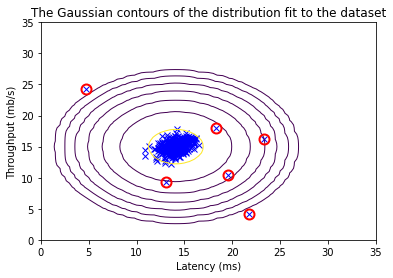

In [59]:
# Find the outliers in the training set
outliers = p < epsilon

# Visualize the fit
visualize_fit(X_train, mu, var)

# Draw a red circle around those outliers
plt.plot(X_train[outliers, 0], X_train[outliers, 1], 'ro', markersize=10, markerfacecolor='none', markeredgewidth=2)